In [1]:
import geodesic
import numpy as np
# import ee
# sa = "earth-engine@double-catfish-291717.iam.gserviceaccount.com"
# creds = ee.ServiceAccountCredentials(sa, '/home/rob/.config/gcloud/gee.json')
# ee.Initialize(creds)

/home/rob/miniconda3/envs/har-reg/lib/python3.8/site-packages/geodesic/utils/downloader.py:36: UserWarning: google.cloud.storage is installed, but GOOGLE_APPLICATION_CREDENTIALS is not set
  warnings.warn(


In [2]:
proj = geodesic.create_project(name='har-reg', alias='harmonic regression demo', description='demo of harmonic regression', keywords=['TCT', 'harmonic regression', 'demo'])
geodesic.set_active_project(proj)

{'name': 'har-reg',
 'alias': 'harmonic regression demo',
 'description': 'demo of harmonic regression',
 'keywords': 'TCT, harmonic regression, demo',
 'uid': '4941c7671b52e1af02090fcae36a301c7129d974',
 'owner': 'auth0|60a83a706acb9a00718c598a'}

In [3]:
proj = geodesic.set_active_project("har-reg")

In [20]:
landsat = geodesic.Dataset.from_google_earth_engine(
    name='landsat-8',
    asset='LANDSAT/LC08/C02/T1_L2',
    credential='gee-service-account',
    alias='Landsat 8 Surface Reflectance',
    domain='earth-bservation',
    category='satellite',
    type='electro-optical',
)
landsat.save()

In [3]:
ds = geodesic.get_objects(search='landsat-8')[0]
ds.alias

'Landsat 8 Surface Reflectance'

In [5]:
ds.keys()

dict_keys(['project', 'uid', 'class', 'domain', 'category', 'type', 'name', 'geometry', 'item', 'description'])

In [9]:
ds.item['item_assets']

{'QA_PIXEL': {'title': 'QA_PIXEL', 'type': 'image/tiff; application=geotiff'},
 'QA_RADSAT': {'title': 'QA_RADSAT',
  'type': 'image/tiff; application=geotiff'},
 'SR_B1': {'title': 'SR_B1', 'type': 'image/tiff; application=geotiff'},
 'SR_B2': {'title': 'SR_B2', 'type': 'image/tiff; application=geotiff'},
 'SR_B3': {'title': 'SR_B3', 'type': 'image/tiff; application=geotiff'},
 'SR_B4': {'title': 'SR_B4', 'type': 'image/tiff; application=geotiff'},
 'SR_B5': {'title': 'SR_B5', 'type': 'image/tiff; application=geotiff'},
 'SR_B6': {'title': 'SR_B6', 'type': 'image/tiff; application=geotiff'},
 'SR_B7': {'title': 'SR_B7', 'type': 'image/tiff; application=geotiff'},
 'SR_QA_AEROSOL': {'title': 'SR_QA_AEROSOL',
  'type': 'image/tiff; application=geotiff'},
 'ST_ATRAN': {'title': 'ST_ATRAN', 'type': 'image/tiff; application=geotiff'},
 'ST_B10': {'title': 'ST_B10', 'type': 'image/tiff; application=geotiff'},
 'ST_CDIST': {'title': 'ST_CDIST', 'type': 'image/tiff; application=geotiff'},
 'S

In [4]:
res = ds.query(bbox=(-94.169998,44.866333,-94.156609,44.873389), datetime=('2023-01-01','2023-12-31'), limit=None)

In [5]:
date_list = []
for feat in res.features:
    date_list.append(feat['properties']['DATE_ACQUIRED'])

In [6]:
date_list.sort()
date_list

['2023-01-06',
 '2023-01-31',
 '2023-02-07',
 '2023-02-23',
 '2023-03-20',
 '2023-03-27',
 '2023-04-12',
 '2023-05-07',
 '2023-05-14',
 '2023-05-23',
 '2023-05-30',
 '2023-06-08',
 '2023-06-15',
 '2023-06-24',
 '2023-07-01',
 '2023-07-10',
 '2023-07-17',
 '2023-07-26',
 '2023-08-02',
 '2023-08-11',
 '2023-08-18',
 '2023-08-27',
 '2023-09-03',
 '2023-09-12',
 '2023-09-19',
 '2023-10-05']

In [48]:
import datetime

In [49]:
# convert the date_list to datetimes then make a new list of the difference between each date
date_list = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in date_list]
date_diffs = [date_list[i+1] - date_list[i] for i in range(len(date_list)-1)]

In [50]:
date_diffs

[datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=16),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=16),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=25),
 datetime.timedelta(days=16),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=16),
 datetime.timedelta(days=9),
 datetime.timedelta(days=16),
 datetime.timedelta(days=7),
 datetime.timedelta(days=16),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=7),
 datetime.timedelta(days=9),
 datetime.timedelta(days=23),
 datetime.timedelta(days=9),
 datetime.timedelta(days=32)]

In [34]:
arr = ds.get_pixels(
    bbox=(-94.169998,44.866333,-94.156609,44.873389), 
    datetime=('2022-12-01','2022-12-31'), 
    output_srs='EPSG:3857',
    pixel_size=30,
    asset_bands=[{"asset":"SR_B2", "bands":[0]}],
    pixel_dtype=np.uint16
)

In [35]:
arr.max()

56141

In [26]:
import matplotlib.pyplot as plt

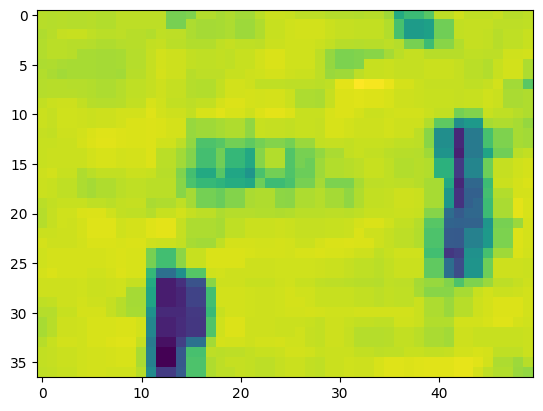

In [27]:
plt.imshow(arr[0,:,:])